# Active Galaxy Nuclei detection from continuum spectra in the SDSS - A Data Science aproach to astronomy

### Jaime Silva, Chihab Khnifass, Angela Montoya, Carlos Porras
### Final project - Introduction to Data Science and Data Visualization
### Universidad Nacional de Colombia 



*Abstract:* The main objective of this Notebook is to implement different classificators and different technique of feature extraction and features selection to identify if an astronomic object is a Star, a Galaxy or a Quasar.

   ###  I) DATA PREPARATION

In [1]:
import joblib
import pandas as pd

In [2]:
#dataset mas grande que antes
df=joblib.load("data/medium.joblib")
df

,FLUX_3.5600,FLUX_3.5601,FLUX_3.5602,FLUX_3.5603,FLUX_3.5604,FLUX_3.5605,FLUX_3.5606,FLUX_3.5607,FLUX_3.5608,FLUX_3.5609,...,MODEL_3.9999,MODEL_4.0000,ra,dec,class,z,plate,mjd,fiberid,deredSN2
specobjid,,,,,,,,,,,,,,,,,,,,,
5278442614693318656,0.420023,4.738983,-1.639199,-3.824910,5.911463,5.213248,0.706732,0.105100,5.063790,7.601273,...,3.622302,3.630245,135.986760,44.554012,GALAXY,0.364056,4688,56008,814,8.02797
5771382263301558272,2.218949,3.160341,1.415436,-1.006396,-1.037927,1.003608,2.336863,4.245072,4.309128,2.549039,...,9.576959,9.582603,19.683591,22.994141,GALAXY,0.141833,5126,55923,70,7.80274
5327927503851114496,8.681429,-11.233210,9.010053,4.523499,5.194839,2.488315,1.749791,6.603962,0.682046,-5.839457,...,0.927221,0.942549,163.563320,2.509434,GALAXY,0.569191,4732,55648,615,8.41838
4965265697100025856,-0.925472,-1.188074,-0.806738,0.526379,-0.597940,-2.700016,-0.531075,0.792433,1.923451,0.609599,...,1.849819,1.853152,338.419100,5.288300,GALAXY,0.479037,4410,56187,171,8.98737
10566641405220114432,1.233917,1.741172,-4.932346,23.809027,-6.837817,6.812706,13.774871,-13.514325,1.792809,-8.490336,...,0.316690,0.309001,34.242564,0.342847,GALAXY,0.847324,9385,58099,257,7.93252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581828771516534784,14.946466,14.448165,9.885964,12.755141,24.863268,9.458821,24.251238,13.435109,10.934933,25.792227,...,6.105735,6.120405,230.352940,46.736050,STAR,-0.000483,6734,56386,68,9.37717
6537033239110111232,2.423653,1.083916,-3.080085,2.254264,-0.824761,1.631145,1.776871,-0.308378,1.254579,1.345754,...,15.598204,14.924174,145.694050,30.948545,STAR,0.000180,5806,56310,212,9.67117
7267817046448295936,-0.969628,1.281691,-3.111764,-3.392078,-0.017491,1.602356,0.154054,0.068322,1.264121,-4.809132,...,3.841213,3.938601,154.112090,30.801705,STAR,0.000414,6455,56370,484,9.31134


In [3]:
#delete useless features id
df.drop([ 'fiberid'], axis=1, inplace=True)

In [4]:
#delete raw with NaN
df=df.dropna()

We will encode class label (Quasar,Galaxy and star) to integer (0,1,2)

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df_fe = df

# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_fe['class'])
df_fe['class'] = y_encoded

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
#See the result of the encoding
df_fe['class']


specobjid
5278442614693318656     0
5771382263301558272     0
5327927503851114496     0
4965265697100025856     0
10566641405220114432    0
                       ..
7581828771516534784     2
6537033239110111232     2
7267817046448295936     2
4321222078156263424     2
6157720964400697344     2
Name: class, Length: 22345, dtype: int64

Due to the important number of features and Data we wille normalize the dataset for a fastest computation

In [7]:
#normalize the data between 0 and 1 for a  fastest computation
scaler = MinMaxScaler()
sdss = scaler.fit_transform(df_fe.drop('class', axis=1))

In [8]:
#Verification that there is no NaN
df.isnull().sum()

FLUX_3.5600    0
FLUX_3.5601    0
FLUX_3.5602    0
FLUX_3.5603    0
FLUX_3.5604    0
              ..
class          0
z              0
plate          0
mjd            0
deredSN2       0
Length: 30814, dtype: int64

###  II)Reduction of the number of features
   ###  a)Feature extraction thanks to a dimensional reduction
   ###  1)LDA

Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. This technique for dimensional reduction could be good for our project because we have a classification problem

In [9]:
#X is the set of all features
X=sdss
#y is the target class
y=df_fe['class']


In [10]:
#feature extraction to reduce the number of features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split



#Split the dataset between train and test to aply LDA
X_trainl, X_testl, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Create an LDA that will reduce the data down to 2 feature becaus we have to choose: number of class - 1 = 2 
lda = LinearDiscriminantAnalysis(n_components=2)

# run an LDA and use it to transform the features on the train set
X_train = lda.fit(X_trainl, y_train).transform(X_trainl)

X_test =  lda.transform(X_testl)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [11]:
#See the result of the LDA
X_trainp = pd.DataFrame(X_train)
X_trainp

,0,1
0,5.945536,0.683900
1,-3.464554,-5.649419
2,-3.685897,10.894139
3,6.013062,2.593742
4,7.317703,-2.200197
...,...,...
14966,6.615082,-0.035711
14967,-4.155076,9.744721
14968,9.324032,-0.040497
14969,6.871570,0.545420


In [12]:
X_testp = pd.DataFrame(X_test)
X_testp

,0,1
0,-12.251449,-5.219652
1,6.990336,1.559395
2,-1.808860,9.928623
3,-0.827382,9.912041
4,-2.525756,2.066852
...,...,...
7369,7.950091,1.006240
7370,5.757429,7.325681
7371,-4.666276,-8.227756
7372,-9.442462,8.850452


 ###  2)PCA
 

The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigenvectors on this matrix are computed.Contrary to LDA it's unsupervised but we can have more features on the final dataset.
we reduce the space to 30 features because we know that the key emission and absorption lines are about 15.

In [13]:
from sklearn.decomposition import PCA
# Principal Component Analysis 
pca = PCA(n_components=30)
ugriz = pca.fit_transform(X)



In [14]:
#See the result of the PCA
Xpca=pd.DataFrame(ugriz)
Xpca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-7.110939,2.303279,1.331596,0.241424,-1.197247,-3.654767,-1.692724,1.268413,-0.987753,-1.124890,...,0.939284,-0.081272,0.681660,-0.579545,0.487948,-1.110181,1.349614,-1.070154,0.054412,-1.383752
1,-3.403183,-1.173265,3.922785,6.692560,-0.091238,-2.159926,1.657917,-1.133048,-1.139135,-1.275796,...,-1.330168,-0.546807,0.069524,-0.457547,-0.423085,0.855163,1.303976,0.007251,0.701021,0.134902
2,-3.201880,3.376301,2.049639,-0.478147,-3.743812,-0.646420,-0.682998,-2.481045,-2.595568,1.268277,...,-0.813707,-0.275541,-0.475717,-0.783347,-0.789979,0.124059,-1.112134,0.683518,0.155799,0.235168
3,-4.995609,-2.291103,-7.266586,-0.686463,-0.764281,0.348354,2.787221,-3.270681,0.734808,1.944188,...,-0.507693,-0.844031,-0.631053,0.338471,-0.884727,-0.042189,1.239950,-0.192652,-0.795036,0.047116
4,-0.135595,-4.523934,-2.337166,0.138769,1.171451,-2.199384,-0.816777,2.637739,0.608089,2.779027,...,0.452637,-0.749700,0.459814,0.354968,-0.395864,-0.225875,-1.148926,0.214742,-0.209782,-0.678130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,3.899000,-2.486519,2.054269,4.340261,-2.044900,1.407312,-2.320249,-2.425881,-0.370204,-0.678138,...,0.563309,0.528110,1.217560,0.340938,0.112629,0.410356,1.497754,0.326552,-0.307013,1.329098
22341,4.282459,-2.497640,1.185793,5.877086,-2.901012,1.277598,1.392817,-1.258173,-1.795758,0.347940,...,0.277781,0.925139,0.977039,1.724358,0.363524,0.140128,-0.468509,0.688251,-0.331348,0.975615
22342,4.543934,-2.115460,2.234635,2.449535,8.786118,0.813442,-2.457396,-2.285924,-2.139477,-1.854662,...,0.339078,0.521111,0.516404,0.294928,0.866013,-1.691511,-2.071605,0.834924,-0.326775,0.304468
22343,20.916397,-0.644546,-0.271125,0.807168,-1.186007,6.049641,-2.559389,-0.042294,-0.427126,0.224475,...,1.498661,0.991513,-1.140122,1.050129,1.218625,0.868098,1.326045,-0.984999,-0.730614,-1.028529


###  b)Feature Selection

For the feature selection we will select the 30 best features for the same reasons as the PCA methods.To choose the best feature we will use the python function which is SLECTKBEST.
We will use chi2 as a score function because we have a classification problem, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y. A large value will mean the feature is non-randomly related to y, and so likely to provide important information. Only 30 features will be retained.

In [15]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 30 features
select_feature = SelectKBest(chi2, k=30).fit(X, y)


In [16]:
select_feature

SelectKBest(k=30, score_func=<function chi2 at 0x7fe7c8c75b70>)

In [17]:
#We select the 30 best columns on the original dataset
cols = select_feature.get_support(indices=True)
Xbest = df_fe.drop('class', axis=1).iloc[:,cols]

In [18]:
#Here we can see the 30 best features
Xbest

,AND_MASK_3.6131,AND_MASK_3.6376,AND_MASK_3.6377,AND_MASK_3.6378,AND_MASK_3.6393,AND_MASK_3.6394,AND_MASK_3.6395,AND_MASK_3.6868,AND_MASK_3.6869,AND_MASK_3.6870,...,OR_MASK_3.6868,OR_MASK_3.6869,OR_MASK_3.6870,OR_MASK_3.6871,OR_MASK_3.6872,OR_MASK_3.8272,OR_MASK_3.8273,OR_MASK_3.8274,OR_MASK_3.8284,z
specobjid,,,,,,,,,,,,,,,,,,,,,
5278442614693318656,0.0,0.0,0.0,0.0,8388608.0,8388608.0,8388608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83886080.0,83886080.0,83886080.0,83886080.0,0.364056
5771382263301558272,0.0,0.0,0.0,0.0,8388608.0,8388608.0,8388608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,84475904.0,84475904.0,84475904.0,83886080.0,0.141833
5327927503851114496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83886080.0,83886080.0,83886080.0,83886080.0,0.569191
4965265697100025856,0.0,0.0,0.0,0.0,8388608.0,8388608.0,8388608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,84410368.0,84410368.0,83886080.0,83886080.0,0.479037
10566641405220114432,0.0,0.0,0.0,0.0,8388608.0,8388608.0,8388608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,84475904.0,84475904.0,84475904.0,83886080.0,0.847324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581828771516534784,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,83886084.0,83886084.0,83886084.0,117440516.0,-0.000483
6537033239110111232,0.0,0.0,0.0,0.0,0.0,8388608.0,8388608.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83886080.0,83886080.0,83886080.0,83886080.0,0.000180
7267817046448295936,0.0,0.0,0.0,0.0,8388608.0,8388608.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83886080.0,83886080.0,83886080.0,83886080.0,0.000414


In [19]:
#Print the best features and their scores
k=pd.DataFrame(cols)
k.index = Xbest.columns
k.columns=['SCORE OF THE FEATURE']
k

,SCORE OF THE FEATURE
AND_MASK_3.6131,9333
AND_MASK_3.6376,9578
AND_MASK_3.6377,9579
AND_MASK_3.6378,9580
AND_MASK_3.6393,9595
AND_MASK_3.6394,9596
AND_MASK_3.6395,9597
AND_MASK_3.6868,10070
AND_MASK_3.6869,10071
AND_MASK_3.6870,10072


In [73]:
Xa,Xb,ya,yb=train_test_split(X, y, test_size=0.33)
select_feature = SelectKBest(chi2, k=30).fit(Xa, ya)
Xa=pd.DataFrame(Xa)
Xa.coulumns = df_fe.drop('class', axis=1).columns
cols = select_feature.get_support(indices=True)
Xbe = Xa.iloc[:,cols]

#Print the best features and their scores
k=pd.DataFrame(cols)
k.index = Xbe.columns
k.columns=['SCORE OF THE FEATURE']
k

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,SCORE OF THE FEATURE
9333,9333
9578,9578
9579,9579
9580,9580
9595,9595
9596,9596
9597,9597
10071,10071
10072,10072
12995,12995


### We can see that we have the same columns to keep if we take the Xtrain or all the dataset 

In [20]:
#We normalize the dataset between 0 and 1
Xbestn = scaler.fit_transform(Xbest)

In [21]:
#See the result
Xbestn

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05248349],
       [0.        , 0.        , 0.        , ..., 0.00349786, 0.        ,
        0.02080698],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08172428],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00064853],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00060441],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00049813]])

### III) Try different model for the classification with all methods used for the reduction of the dataset

In [22]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


### First we will split in train and test (33% of the dataset for the test) the 3 dataset which are the result of 3 methods to reduce the dataset

In [23]:
#Separetion for SelectKbest
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xbestn, y, test_size=0.33)

In [24]:
#Separation for PCA 
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca, y, test_size=0.33)

In [25]:
#Separation for LDA is done when we reduce the dimension



### XGBoost
XGBoost stands for eXtreme Gradient Boosting.Gradiant boosted tree algorithms.It's  designed to be highly efficient

In [26]:
import xgboost as xgb
#Xgboost for KBEST
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=0)
xgb_model.fit(X_trainb, y_trainb)


preds = xgb_model.predict(X_testb)

acc_xgbB = (preds == y_testb).sum().astype(float) / len(preds)*100
print("KBEST")
print("Scikit-Learn's Xgboost Classifier's prediction accuracy is: %3.2f" % (acc_xgbB))


KBEST
Scikit-Learn's Xgboost Classifier's prediction accuracy is: 91.08


In [27]:
#Xgboost for pca

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=0)
xgb_model.fit(X_trainpca, y_trainpca)


preds = xgb_model.predict(X_testpca)

acc_xgbp = (preds == y_testpca).sum().astype(float) / len(preds)*100
print("PCA")
print("Scikit-Learn's XGboost Classifier's prediction accuracy is: %3.2f" % (acc_xgbp))

PCA
Scikit-Learn's XGboost Classifier's prediction accuracy is: 79.21


In [28]:
#Xgboost for LDA

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=0)
xgb_model.fit(X_train, y_train)


preds = xgb_model.predict(X_test)

acc_xgbe = (preds == y_test).sum().astype(float) / len(preds)*100
print("LDA")
print("Scikit-Learn's XGboost Classifier's prediction accuracy is: %3.2f" % (acc_xgbe))

LDA
Scikit-Learn's XGboost Classifier's prediction accuracy is: 76.91


### KNeighborsClassifier

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) 

In [29]:
from sklearn.model_selection import GridSearchCV
#KNN with KBEST
knn = KNeighborsClassifier( leaf_size= 1,
 n_neighbors= 7)

knn.fit(X_trainb, y_trainb)


preds = knn.predict(X_testb)

acc_knnB = (preds == y_testb).sum().astype(float) / len(preds)*100
print("KBEST")
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knnB))

#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,20))
#n_neighbors = list(range(1,20))
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)#Create new KNN object
#knn_2 = KNeighborsClassifier()#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
#best_model = clf.fit(X_trainb, y_trainb)#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


KBEST
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 88.64


In [30]:
#Knn with the best parametre 
knn = KNeighborsClassifier( leaf_size= 1,
 n_neighbors= 7)

knn.fit(X_trainb, y_trainb)


preds = knn.predict(X_testb)

acc_knnB = (preds == y_testb).sum().astype(float) / len(preds)*100
print("KBEST")
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knnB))

KBEST
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 88.64


In [31]:
#KNN with PCA
knn = KNeighborsClassifier()

knn.fit(X_trainpca, y_trainpca)


preds = knn.predict(X_testpca)

acc_knnPCA = (preds == y_testpca).sum().astype(float) / len(preds)*100
print("PCA")
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knnPCA))

PCA
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 76.66


In [32]:
#KNN with LDA
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


preds = knn.predict(X_test)

acc_knne = (preds == y_test).sum().astype(float) / len(preds)*100
print("LDA")
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knne))

LDA
Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 77.41


### Naive Bayes classifier
Primarily Naïve Bayes is a linear classifier, which is a supervised machine learning method and works as a probabilistic classifier as well. When handling real-time data with continuous distribution, Naïve Bayes classifier considers that the big data is generated through a Gaussian process with normal distribution.

In [33]:
#GNB for Kbest
from sklearn.preprocessing import MaxAbsScaler
#first we transform the data to be normally distributed to have better result
scaler_gnb = MaxAbsScaler()
sds = scaler_gnb.fit_transform(Xbestn)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sds, y, test_size=0.33)

#we create the classifier
gnb = GaussianNB()

gnb.fit(X_train_gnb, y_train_gnb)


preds = gnb.predict(X_test_gnb)

acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100

print("Kbest")
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))


Kbest
Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 36.89


In [34]:
#GNB for PCA
scaler_gnb = MaxAbsScaler()
sds = scaler_gnb.fit_transform(Xpca)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sds, y, test_size=0.33)

gnb = GaussianNB()

gnb.fit(X_train_gnb, y_train_gnb)


preds = gnb.predict(X_test_gnb)

acc_gnbPCA = (preds == y_test_gnb).sum().astype(float) / len(preds)*100

print("PCA")
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnbPCA))


PCA
Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 52.52


In [35]:
#GNB for LDA
scaler_gnb = MaxAbsScaler()
X_train_gnb = scaler_gnb.fit_transform(X_train)
X_test_gnb = scaler_gnb.fit_transform(X_test)


gnb = GaussianNB()

gnb.fit(X_train_gnb, y_train)


preds = gnb.predict(X_test_gnb)

acc_gnbe = (preds == y_test).sum().astype(float) / len(preds)*100

print("LDA")
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnbe))


LDA
Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 51.97


### RandomForrest
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [36]:
#rfc for Kbest with 15 tree
rfc = RandomForestClassifier(n_estimators=15)

rfc.fit(X_trainb, y_trainb)


preds = rfc.predict(X_testb)

acc_rfcb = (preds == y_testb).sum().astype(float) / len(preds)*100
print("Kbest")
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfcb))

Kbest
Scikit-Learn's Random Forest Classifier's prediction accuracy is: 88.97


In [37]:
#rfc for LDA
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)


preds = rfc.predict(X_test)

acc_rfce = (preds == y_test).sum().astype(float) / len(preds)*100
print("LDA")
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfce))

LDA
Scikit-Learn's Random Forest Classifier's prediction accuracy is: 76.65


In [38]:
#rfc for PCA
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_trainpca, y_trainpca)


preds = rfc.predict(X_testpca)

acc_rfcpca = (preds == y_testpca).sum().astype(float) / len(preds)*100
print("PCA")
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfcpca))

PCA
Scikit-Learn's Random Forest Classifier's prediction accuracy is: 74.64


### Support vector machine
SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [39]:
#svm for kbest
svc = SVC()

svc.fit(X_trainb, y_trainb)

preds = svc.predict(X_testb)

acc_svc = (preds == y_testb).sum().astype(float) / len(preds)*100
print("KBEST")
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KBEST
Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 73.53


In [40]:
#svm for PCA
svc = SVC()

svc.fit(X_trainpca, y_trainpca)

preds = svc.predict(X_testpca)

acc_svcpca = (preds == y_testb).sum().astype(float) / len(preds)*100
print("PCA")
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svcpca))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


PCA
Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 40.25


In [41]:
#svm for LDA
svc = SVC()

svc.fit(X_train, y_train)

preds = svc.predict(X_test)

acc_svce = (preds == y_test).sum().astype(float) / len(preds)*100
print("LDA")
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svce))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LDA
Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 68.65


### Catboost
CatBoost is an algorithm for gradient boosting on decision trees. Developed by Yandex researchers and engineers.

In [42]:
#catboost with kbest
import catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=1000, 
    learning_rate=0.05)


clf.fit(X_trainb, y_trainb,  
        eval_set=(X_testb, y_testb), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())
preds = clf.predict(data=X_testb)
preds = preds[:,0]
acc_clfb = (preds == y_testb).sum().astype(float) / len(preds)*100
print("kbest")
print("Scikit-Learn's catboost Classifier's prediction accuracy is: %3.2f" % (acc_clfb))

CatBoost model is fitted: True
CatBoost model parameters:
{'learning_rate': 0.05, 'iterations': 1000}
kbest
Scikit-Learn's catboost Classifier's prediction accuracy is: 91.19


In [43]:
#catboost with PCA
clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.05)


clf.fit(X_trainpca, y_trainpca,  
        eval_set=(X_testpca, y_testpca), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())
preds = clf.predict(data=X_testpca)
preds = preds[:,0]
acc_clfp = (preds == y_testpca).sum().astype(float) / len(preds)*100
print("PCA")
print("Scikit-Learn's catboost Classifier's prediction accuracy is: %3.2f" % (acc_clfp))

CatBoost model is fitted: True
CatBoost model parameters:
{'learning_rate': 0.05, 'iterations': 1000}
PCA
Scikit-Learn's catboost Classifier's prediction accuracy is: 79.55


In [44]:
#catboost with LDA
clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.05)


clf.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())
preds = clf.predict(data=X_test)
preds = preds[:,0]
acc_clfe = (preds == y_test).sum().astype(float) / len(preds)*100
print("LDA")
print("Scikit-Learn's catboost Classifier's prediction accuracy is: %3.2f" % (acc_clfe))


CatBoost model is fitted: True
CatBoost model parameters:
{'learning_rate': 0.05, 'iterations': 1000}
LDA
Scikit-Learn's catboost Classifier's prediction accuracy is: 73.31


### Neural network
We implement thanks to tensorflow a multiple layers perceptron for the classification.After tried differents parameter we choosed a NN of 5 layers:
- The number of neurones of the first layer is the numbers of column of the dataset
- The The number of neurones of the second and third  layers are 10 and for the fourth the number is 6
- to conclude the number of neurones for the ultimate layer is 3 because their are 3 class


In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
#Kbest data preparation
#Data preparation for the neural network
#encode the target class
le = LabelEncoder()
le.fit(y_trainb)
y_trainb = le.transform(y_trainb)
le.fit(y_testb)
y_testb = le.transform(y_testb)

y_trainb = to_categorical(y_trainb)
y_testb = to_categorical(y_testb)

# scale features
scaler = StandardScaler()
scaler.fit(X_trainb) # fit scaler to training data only
X_trainb = pd.DataFrame(scaler.transform(X_trainb))
X_testb = pd.DataFrame(scaler.transform(X_testb))





In [46]:
#PCA data preparation
#Data preparation for the neural network
#encode the target class
le = LabelEncoder()
le.fit(y_trainpca)
y_trainpca = le.transform(y_trainpca)
le.fit(y_testpca)
y_testpca = le.transform(y_testpca)

y_trainpca = to_categorical(y_trainpca)
y_testpca = to_categorical(y_testpca)

# scale features
scaler = StandardScaler()
scaler.fit(X_trainpca) # fit scaler to training data only
X_trainpca = pd.DataFrame(scaler.transform(X_trainpca))
X_testpca = pd.DataFrame(scaler.transform(X_testpca))

In [47]:
#LDA data preparation
#Data preparation for the neural network
#encode the target class
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
le.fit(y_test)
y_test = le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# scale features
scaler = StandardScaler()
scaler.fit(X_train) # fit scaler to training data only
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [48]:
# create a deep neural network model
num_features = X_train.shape[1]
dnn = tf.keras.Sequential()
dnn.add(Dense(10, input_dim=num_features, activation='relu'))
dnn.add(Dropout(0.1))#the dropout to avoid overfitting
dnn.add(Dense(10, activation='relu'))
dnn.add(Dropout(0.1))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dense(3, activation='softmax', name='output'))#3 because their are 3 class to precict

dnn.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['categorical_accuracy'])


# train DNN
my_epochs = 50
history = dnn.fit(X_train, y_train, epochs=my_epochs, batch_size=50,validation_data=(X_test, y_test))
preds = pd.DataFrame(dnn.predict(X_test))
preds = preds.idxmax(axis=1)
y_testt = y_test.dot([0,1,2])
model_acce = (preds == y_testt).sum().astype(float) / len(preds) * 100
print('LDA')
print('Deep Neural Network')
print('Validation Accuracy: %3.5f' % (model_acce))

Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4904 - categorical_accuracy: 0.8475 - val_loss: 0.9517 - val_categorical_accuracy: 0.7643
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0427 - categorical_accuracy: 0.9951 - val_loss: 1.5210 - val_categorical_accuracy: 0.7581
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.0135 - categorical_accuracy: 0.9967 - val_loss: 1.8624 - val_categorical_accuracy: 0.7592
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.0076 - categorical_accuracy: 0.9977 - val_loss: 2.1110 - val_categorical_accuracy: 0.7590
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.0065 - categorical_accuracy: 0.9985 - val_loss: 2.3283 - val_categorical_accuracy: 0.7624
Epoch 6/50
300/300 [==============================] - 1s 5ms/step - loss: 0.0052 - categorical_accuracy: 0.9986 - val_loss: 2.5036 - val_categorical_accuracy: 0.7608
Epoc

Epoch 50/50
300/300 [==============================] - 2s 5ms/step - loss: 0.0013 - categorical_accuracy: 0.9998 - val_loss: 5.2709 - val_categorical_accuracy: 0.7654
LDA
Deep Neural Network
Validation Accuracy: 76.53919


In [49]:
# create a deep neural network model
num_features = X_trainb.shape[1]
dnn = tf.keras.Sequential()
dnn.add(Dense(10, input_dim=num_features, activation='relu'))
dnn.add(Dropout(0.1))#the dropout to avoid overfitting
dnn.add(Dense(10, activation='relu'))
dnn.add(Dropout(0.1))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dense(3, activation='softmax', name='output'))#3 because their are 3 class to precict

dnn.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['categorical_accuracy'])


# train DNN
my_epochs = 50
history = dnn.fit(X_trainb, y_trainb, epochs=my_epochs, batch_size=50,validation_data=(X_testb, y_testb))
preds = pd.DataFrame(dnn.predict(X_testb))
preds = preds.idxmax(axis=1)
y_testbt = y_testb.dot([0,1,2])
model_acc = (preds == y_testbt).sum().astype(float) / len(preds) * 100
print('kbest')
print('Deep Neural Network')
print('Validation Accuracy: %3.5f' % (model_acc))

Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.9401 - categorical_accuracy: 0.6167 - val_loss: 0.7447 - val_categorical_accuracy: 0.7236
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.6561 - categorical_accuracy: 0.7165 - val_loss: 0.4988 - val_categorical_accuracy: 0.7475
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4822 - categorical_accuracy: 0.8082 - val_loss: 0.3599 - val_categorical_accuracy: 0.8832
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4010 - categorical_accuracy: 0.8440 - val_loss: 0.3142 - val_categorical_accuracy: 0.8900
Epoch 5/50
300/300 [==============================] - 1s 5ms/step - loss: 0.3612 - categorical_accuracy: 0.8615 - val_loss: 0.2929 - val_categorical_accuracy: 0.8950
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3416 - categorical_accuracy: 0.8709 - val_loss: 0.2842 - val_categorical_accuracy: 0.8998
Epoc

In [50]:
# create a deep neural network model
num_features = X_trainpca.shape[1]
dnn = tf.keras.Sequential()
dnn.add(Dense(10, input_dim=num_features, activation='relu'))
dnn.add(Dropout(0.1))#the dropout to avoid overfitting
dnn.add(Dense(10, activation='relu'))
dnn.add(Dropout(0.1))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dense(3, activation='softmax', name='output'))#3 because their are 3 class to precict

dnn.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['categorical_accuracy'])


# train DNN
my_epochs = 50
history = dnn.fit(X_trainpca, y_trainpca, epochs=my_epochs, batch_size=50,validation_data=(X_testpca, y_testpca))
preds = pd.DataFrame(dnn.predict(X_testpca))
preds = preds.idxmax(axis=1)
y_testpcat = y_testpca.dot([0,1,2])
model_accpca = (preds == y_testpcat).sum().astype(float) / len(preds) * 100
print('PCA')
print('Deep Neural Network')
print('Validation Accuracy: %3.5f' % (model_accpca))

Epoch 1/50
300/300 [==============================] - 1s 5ms/step - loss: 1.0579 - categorical_accuracy: 0.4726 - val_loss: 1.0073 - val_categorical_accuracy: 0.5190
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.9883 - categorical_accuracy: 0.5292 - val_loss: 0.9558 - val_categorical_accuracy: 0.5567
Epoch 3/50
300/300 [==============================] - 1s 5ms/step - loss: 0.9438 - categorical_accuracy: 0.5608 - val_loss: 0.9078 - val_categorical_accuracy: 0.5881
Epoch 4/50
300/300 [==============================] - 1s 5ms/step - loss: 0.9012 - categorical_accuracy: 0.5932 - val_loss: 0.8623 - val_categorical_accuracy: 0.6256
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 0.8675 - categorical_accuracy: 0.6125 - val_loss: 0.8280 - val_categorical_accuracy: 0.6391
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.8342 - categorical_accuracy: 0.6322 - val_loss: 0.8070 - val_categorical_accuracy: 0.6663
Epoc

### IV) Results

In [51]:
#we create a list of all result
SVM = [acc_svce, acc_svcpca, acc_svc]
KNN = [acc_knne, acc_knnPCA, acc_knnB]
RFC = [acc_rfce, acc_rfcpca, acc_rfcb]
GNB = [acc_gnbe, acc_gnbPCA, acc_gnb ]
CATBOOST = [acc_clfe,acc_clfp,acc_clfb]
XGBOOST=[acc_xgbe,acc_xgbp,acc_xgbB]
NeuralNetwork=[model_acce,model_accpca,model_acc]


In [52]:
#Creation of a dataframe of the result
result=[SVM,KNN,RFC,GNB,CATBOOST,XGBOOST,NeuralNetwork]
result
Res=pd.DataFrame(result)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#Rename the columns
Res.columns=['LDA','PCA','SelectKbest']

In [55]:
Res

,LDA,PCA,SelectKbest
0,68.646596,40.249525,73.528614
1,77.407106,76.661242,88.635747
2,76.647681,74.640629,88.974776
3,51.966368,52.522376,36.886357
4,73.311635,79.549769,91.185245
5,76.905343,79.210740,91.076756
6,76.539192,76.878221,90.656360


In [56]:
#Rename the Index
Res.rename(index={0: 'SVM',1:'KNN',2:'RFC',3:'GNB',4:'CATBOOST',5:'XGBOOST',6:'NeuralNetwork'})

,LDA,PCA,SelectKbest
SVM,68.646596,40.249525,73.528614
KNN,77.407106,76.661242,88.635747
RFC,76.647681,74.640629,88.974776
GNB,51.966368,52.522376,36.886357
CATBOOST,73.311635,79.549769,91.185245
XGBOOST,76.905343,79.210740,91.076756
NeuralNetwork,76.539192,76.878221,90.656360


### On this dataframe we can see the accuracy for all methods

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


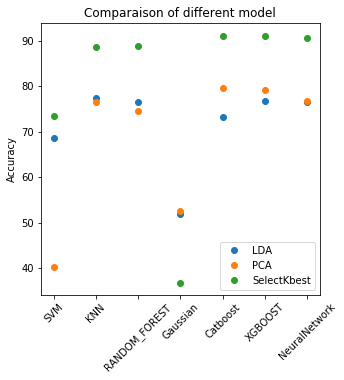

In [85]:
#PLOT THE RESULT
p=['SVM', 'KNN', 'RANDOM_FOREST', 'Gaussian','Catboost','XGBOOST','NeuralNetwork']
figure = plt.figure(figsize=(5, 5))
plt.plot(p,Res.LDA, marker="o", linestyle="", label='LDA')
plt.plot(p,Res.PCA, marker="o", linestyle="", label='PCA')
plt.plot(p,Res.SelectKbest, marker="o", linestyle="", label='SelectKbest')
axes = figure.add_subplot(111)

axes.set_xticklabels(p, rotation=45)
plt.ylabel("Accuracy")
plt.title("Comparaison of different model")
plt.legend()

### As we can see SelectKbest is the best method for the reduction of the dataset and the best classifier with this methods is the catboost with a accuracy of 0,91 which is good
### Gaussian doesn't work very well as for LDA because the features are not normally distributed
### Pca doesn't work very well because it's unsupervised
### random forest and catboost and XGBOOST work very well because the two are using a lots of decision tree and most catboost and xgboost because they use gradient boosting also to be more efficient